# Managing Access at Scale Using Access Points

## Principle of least privilege

Least privilege is a security design strategy by which you grant only the minimum necessary permissions required to accomplish the task. With least privilege, you start with a strict set of minimum permissions and grant additional permissions only when necessary. Starting with tight restrictions and adding new ones when required is more secure. Starting with too lenient permissions and then trying to tighten them later is less secure.

When working with Amazon S3, identify what each user, role, and application needs to accomplish within your buckets. Then, create policies that allow them to perform only those specific tasks. When granting permissions, decide who gets permissions and into which Amazon S3 resources. Enable specific actions that you want to allow on those resources. Implementing least privilege access is fundamental in reducing security vulnerabilities.


## Access Points overview
Access points are named network endpoints that attach to S3 buckets. They enforce distinct permissions and network controls for any request made through the access point.



You can access the objects in an Amazon S3 bucket with an access point using the AWS Management Console, AWS CLI, AWS SDKs, or the S3 REST APIs. 

### What are Access Points
Access point names must meet the following conditions:

- Must be unique within a single AWS account and Region

- Must comply with DNS naming restrictions

- Must begin with a number or lowercase letter

- Must be between 3 and 50 characters long

- Can't begin or end with a dash

- Can't contain underscores, uppercase letters, or periods

### Access Point Names
- Each access point is associated with only one bucket.
- You can create a maximum of 1,000 access points per AWS account per Region. 
- Access point policies are limited to 20 KB in size.
- You can use access points to only perform operations on objects. You can't use access points to perform other Amazon S3 operations, such as modifying or deleting buckets.
- Access points work with some, but not all, AWS services and features. For example, you can't use an access point as a destination for S3 Cross-Region Replication.

### Limitations
You can find logging for Amazon S3 requests in CloudTrail logs. These include requests made through access points and requests made to the APIs that manage access points.

### Monitoring
You can find logging for Amazon S3 requests in CloudTrail logs. These include requests made through access points and requests made to the APIs that manage access points.

### Permissions
You can create permissions per Access Point to limit public access. You can also restrict access by object prefixes and object tags.


## Why use them? 

Access points provide simplified control for shared datasets in the same bucket. Each access point has its own access permissions. You add access points as your application set grows. Each application or group can have its own access points. 

Access Points help manage large sets of data without needing to use a long, complex bucket policies. As a bucket policy grows in complexity, managing the policy becomes very time consuming. Access Points also restrict S3 storage access to stay within the virtual private cloud (VPC) thus ensuring your data never leaves the Amazon network. You can also create a service control policy (SCP) and require that all access points be restricted to a VPC. An SCP is a type of policy used to manage permission with AWS Organizations. As a result, a firewall is created around your data within your private networks.        

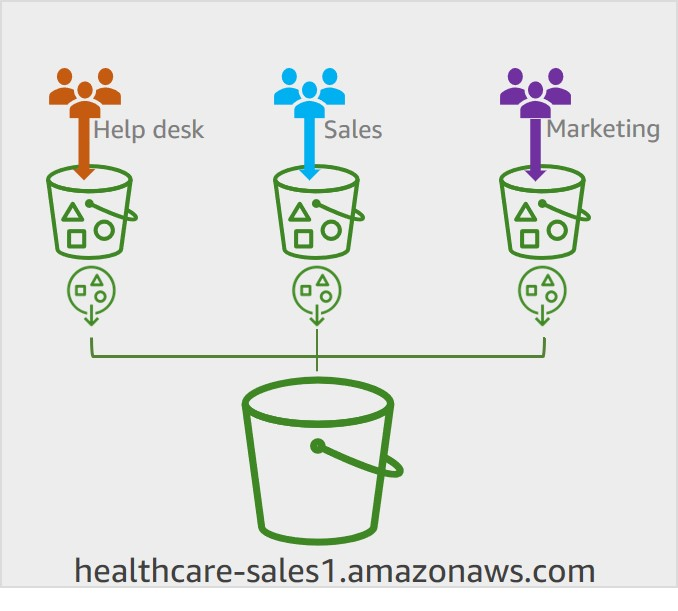

## Access point ARN format

### Access point ARN name format

Access point ARNs use the format:
**arn:partition:service:region:account-id:accesspoint/resource**



For this ARN name example: **arn:aws:s3:us-west-2:1234567890:accesspoint/healthcare** 

- The **arn:partition:service** is arn:aws:s3 
- The **region** is us-west-2
- The **Account-id** is 1234567890
- The **accesspoint/rescource** is healthcare

### Object ARN name format

Objects accessed through an access point use the ARN format:

**arn:partition:service:region:account-id:accesspoint/access-point-name/object/resource**



For this object ARN name example:

**arn:aws:s3:us-east-1:123456789012:accesspoint/aptest/object/monthlyreport**

- The **arn:partition:service** is arn:aws:s3
- The **region** is us-east-1
- The **Account-id** is 123456789012
- The value **accesspoint/access-point-name** is aptest
- **Object/resource** value is object/monthlyreport

## Access control mechanisms for access points

Permission in an access point policy requires that the underlying bucket allow the same access for ease of management. For this reason, AWS recommends that you delegate bucket access control to access points attached to a bucket. To configure a bucket in which all access is through access control policies, configure the bucket policy to allow full access. Then, create access point policies to restrict access based on your user or application needs. 

The figure depicts the various security layers when using access points. To learn more, choose the markers on the figure.

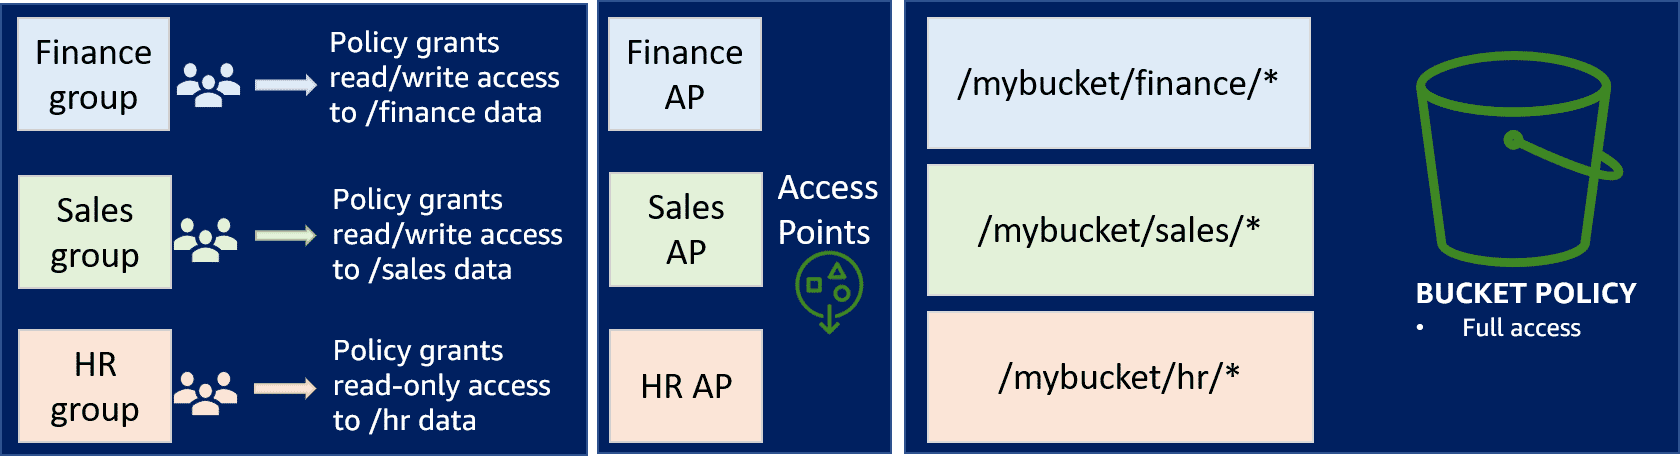

You can further limit the actions in a policy by adding a condition to the policy. If the key that you specify in a policy condition is not present in the request context, the values do not match and the condition is not met.

To learn more about the condition element and its use, in the following code example, choose the marker next to the code line.

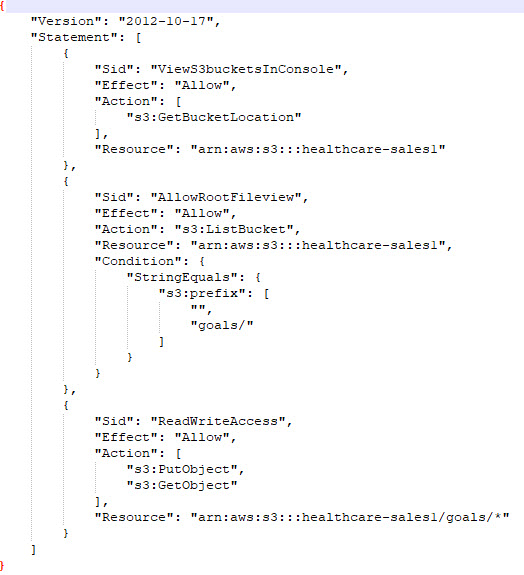



## How do S3 Access Points work?

During access point creation, you can choose requests to originate from a specific VPC. Alternatively, you can choose to make the access point accessible from the internet. An access point that's accessible only from a specified VPC has a network origin of VPC. Amazon S3 rejects any request made to the access point that doesn't originate from that VPC. An access point that's accessible from the internet is said to have a network origin of Internet. It can be used from anywhere on the internet, subject to any other access restrictions in place for the access point, underlying bucket, and related resources, such as the requested objects. 

Adding an S3 access point to a bucket doesn't change the bucket's behavior when accessed through the existing bucket name or ARN. All existing operations against the bucket continue to work as before. Restrictions that you include in an access point policy apply only to requests made through that access point.

## Block Public Access for access points

Amazon S3 Access Points support independent Block Public Access settings for each access point. When you create an access point, you can specify Block Public Access settings that apply to that access point. For any request made through an access point, Amazon S3 evaluates the Block Public Access settings for that access point, the underlying bucket, and the bucket owner's account. If any of these settings indicate that the request should be blocked, Amazon S3 rejects the request. All Block Public Access settings are enabled by default for access points. These settings should remain enabled unless you have a specific use case that would require public access.

Now you know that having public access on your Amazon S3 buckets is strongly discouraged unless your business use case specifically requires public access. What if your business use case does not allow public access, and you find that you need to share objects with external sources for limited time periods? Next, you will learn how to implement presigned URLs to address sharing objects outside of your AWS account securely.